In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("reviews.csv") 

In [4]:
df.shape

(1000, 2)

In [5]:
df.sample(5)

,Description,Is_Response
824,We stayed at the SF Financial District Hilton ...,not happy
298,Please consider Hotel Mela for your next New Y...,happy
98,My wife and I stayed at the Buckingham Hotel f...,happy
64,My family and I were guests in rooms --- & ---...,not happy
227,We stayed in this hotel for part of our honeym...,happy


In [6]:
# Remove all rows with null values
df.dropna(axis=0, inplace=True)

In [7]:
df.shape

(1000, 2)

In [8]:
# Change Is_Response to 0 for no happy and 1 for happy
df['Is_Response'].replace(['happy','not happy'],[1,0], inplace=True)

In [9]:
df.sample(5)

,Description,Is_Response
72,No complaints at all. They were amazing with m...,1
617,"If given the option, we stay at Renaissance ho...",0
862,I just go back home from a perfect stay at the...,1
360,wonderful hotel! most ideal location. perfectl...,1
306,Room was good (except for comforter which was ...,1


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [11]:
X = df['Description']
y = df['Is_Response']

In [43]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
tfidf.fit(X)
features = tfidf.transform(X)

In [44]:
features.shape

(1000, 8212)

In [62]:
#eatures.toarray()[:10,500:520]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [47]:
clf = LogisticRegression().fit(X_train,y_train)

In [48]:
### Train accuracy
clf.score(X_train,y_train)

0.8925

In [49]:
y_pred = clf.predict(X_test)
print("Accuracy Score:",clf.score(X_test,y_test))  

Accuracy Score: 0.79


In [50]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 28  42]
 [  0 130]]


In [51]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        70
           1       0.76      1.00      0.86       130

    accuracy                           0.79       200
   macro avg       0.88      0.70      0.72       200
weighted avg       0.84      0.79      0.76       200



Text(0.5, 23.52222222222222, 'Predicted')

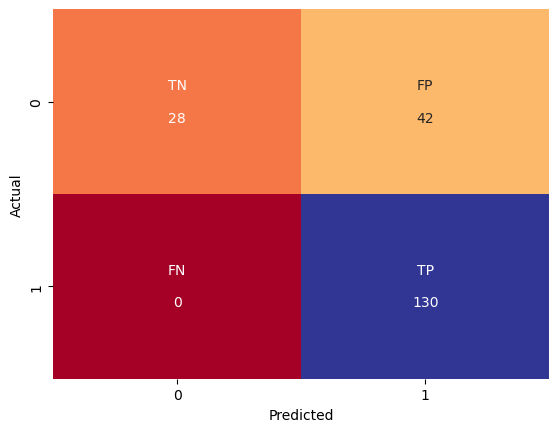

In [52]:
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

### Predict for new data

In [53]:
# tfidf.vocabulary_

In [54]:
# Predict whether the given review is positive or negative 
docs = ["This is very good",
        "Bad room service",
        "Food was awesome"]
# Tfidf
features = tfidf.transform(docs)
print(features.shape)
print(clf.predict(features))

(3, 8212)
[1 0 1]


## Text classification using BernoulliNB

In [55]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
features = tfidf.fit_transform(X).toarray()

In [25]:
#tfidf.vocabulary_.items()

In [56]:
features.shape

(1000, 8212)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [58]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train,y_train)

In [59]:
bnb.score(X_train,y_train)

0.84375

In [60]:
y_pred = bnb.predict(X_test)
print("Accuracy Score:",bnb.score(X_test,y_test))  

Accuracy Score: 0.745


[[ 28  42]
 [  9 121]]


Text(0.5, 23.52222222222222, 'Predicted')

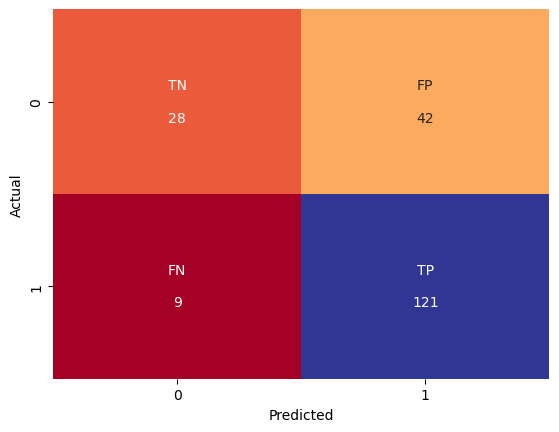

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")